In [10]:
import sys
sys.path.append('../src/lib/')       # per utils
sys.path.append('../src/')           # per kpi_functions e visualization
from utils import *
from kpi_functions import *
from visualization import *

# Dataset Trasformato
df = pd.read_csv('../data/processed/dataset_transformed.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [2]:
# 0. Overview
check_df_info(df)


=== Shape (righe, colonne) ===
(502, 17)

=== Nomi colonne ===
['date', 'interest_income', 'interest_expense', 'average_earning_assets', 'net_income', 'total_assets', 'shareholder_equity', 'operating_expenses', 'operating_income', 'market_share', 'stock_price', 'roa', 'roe', 'cost_income_ratio', 'net_interest_margin', 'asset_growth', 'income_growth']

=== Tipi di dato ===
date                       object
interest_income           float64
interest_expense            int64
average_earning_assets      int64
net_income                float64
total_assets                int64
shareholder_equity          int64
operating_expenses          int64
operating_income            int64
market_share                int64
stock_price                 int64
roa                       float64
roe                       float64
cost_income_ratio         float64
net_interest_margin       float64
asset_growth              float64
income_growth             float64
dtype: object

=== Info DataFrame ===
<class '

In [12]:
# KPI Redditività
roa_summary = summarize_kpis(df)['roa']
roe_summary = summarize_kpis(df)['roe']

In [13]:
# KPI Efficienza
cost_income_summary = summarize_kpis(df)['cost_income_ratio']

# Margine di interesse
nim_summary = summarize_kpis(df)['net_interest_margin']

In [8]:
# KPI Crescita
assets_growth_summary = summarize_kpis(df)['asset_growth']
income_growth_summary = summarize_kpis(df)['income_growth']

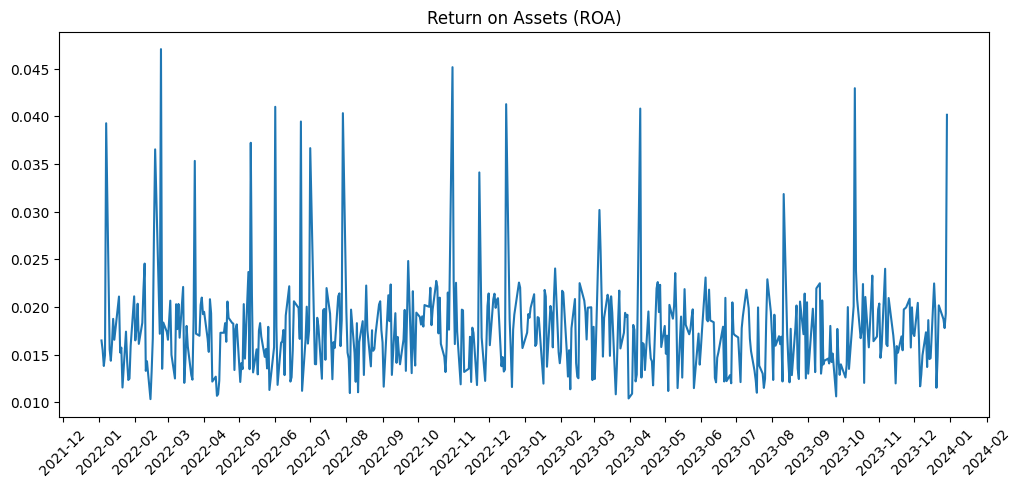

Grafico salvato in: ../reports/figures/roa_timeseries.png


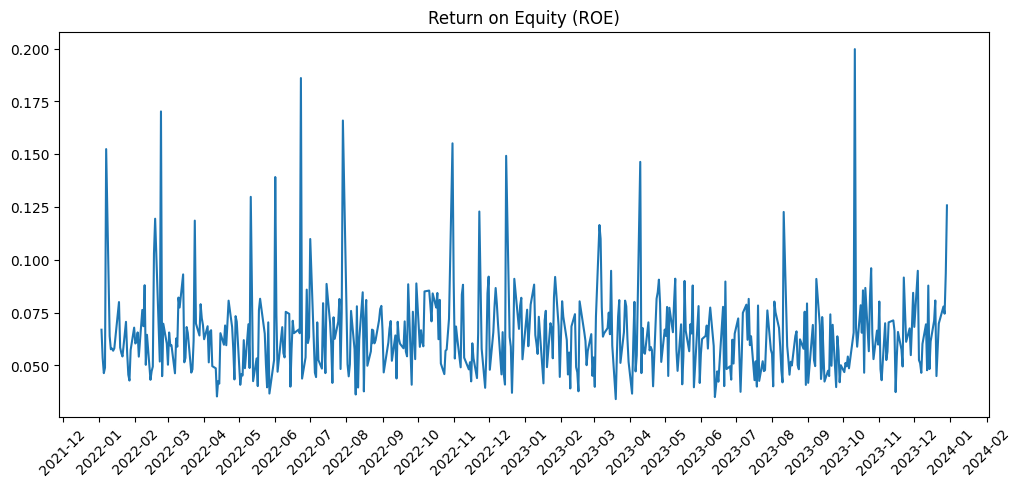

Grafico salvato in: ../reports/figures/roe_timeseries.png


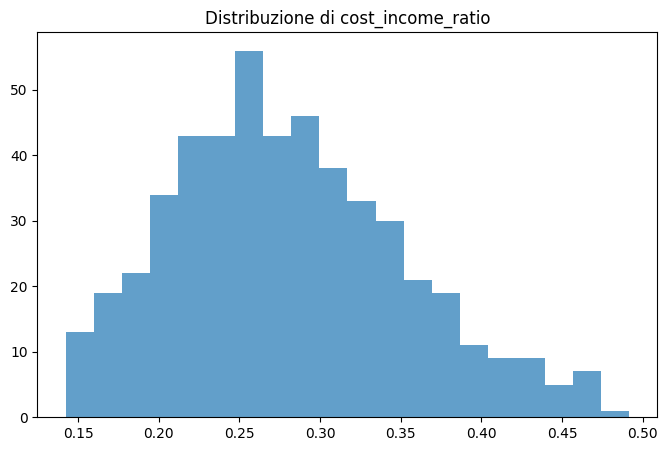

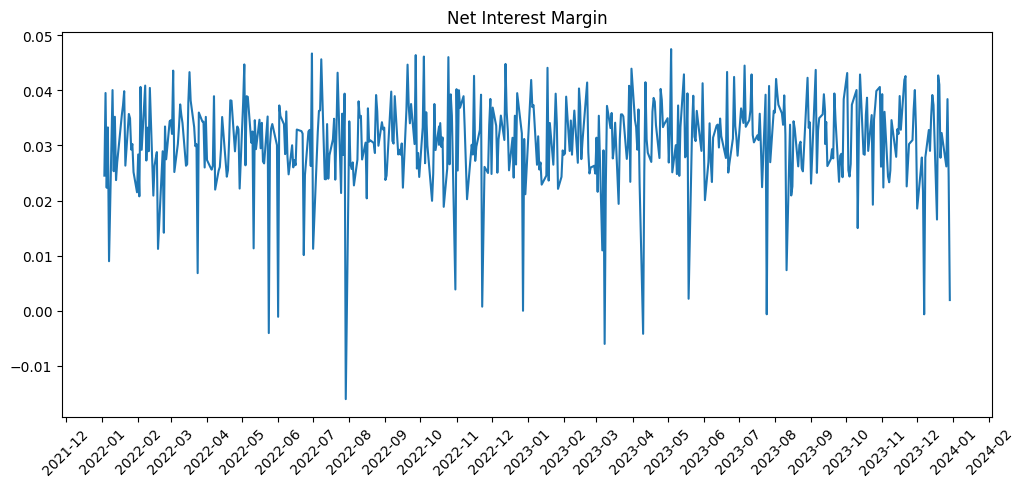

Grafico salvato in: ../reports/figures/nim_timeseries.png


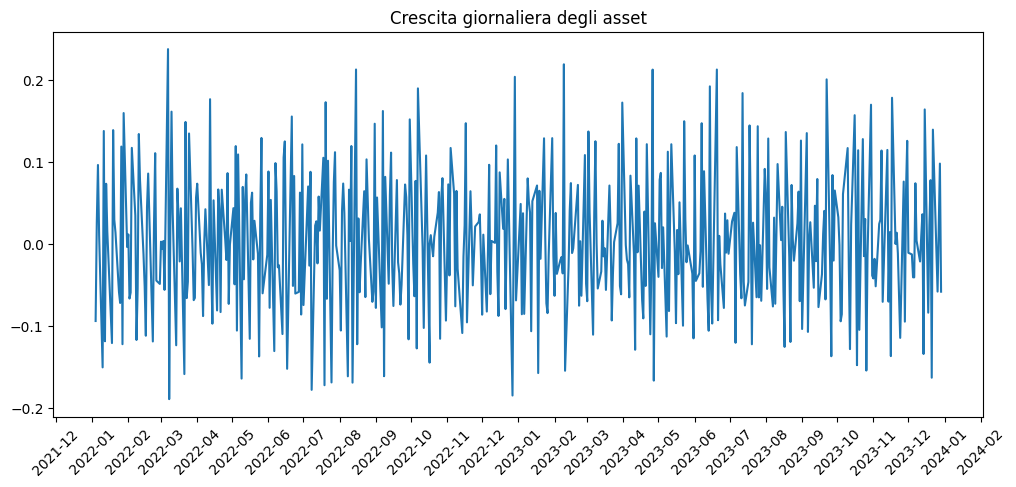

Grafico salvato in: ../reports/figures/assets_growth_timeseries.png


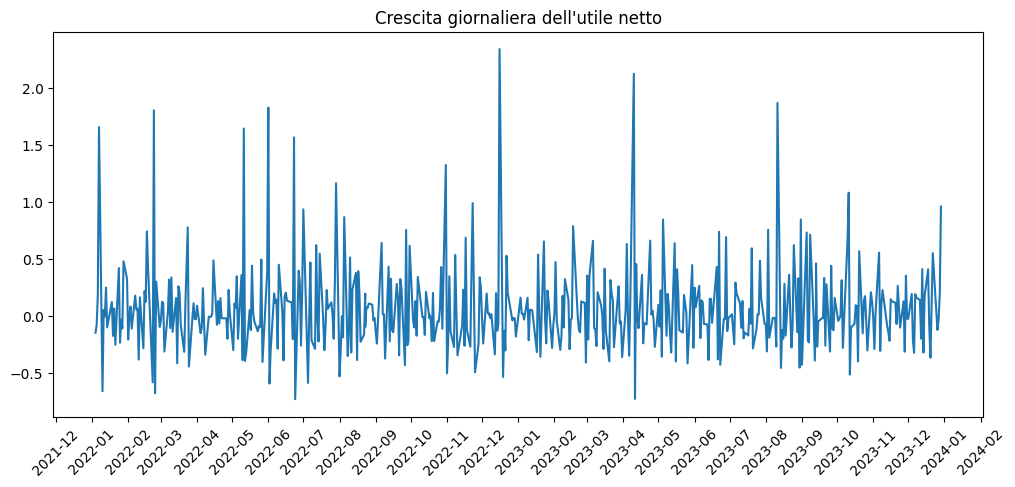

Grafico salvato in: ../reports/figures/income_growth_timeseries.png


In [14]:
# Grafici
### KPI Redditività: ROA
# Visualizzazione della serie temporale del Return on Assets (ROA) con media mobile e gestione date per renderle leggibili.
plot_timeseries_dates(
    df, 
    'roa', 
    'Return on Assets (ROA)', 
    save_path='../reports/figures/roa_timeseries.png'
)


# KPI Redditività: ROE
plot_timeseries_dates(
    df, 
    'roe', 
    'Return on Equity (ROE)', 
    save_path='../reports/figures/roe_timeseries.png'
)

# KPI Efficienza: Cost/Income
plot_histogram(
    df, 
    'cost_income_ratio', 
    bins=20, 
    save_path='../reports/figures/cost_income_hist.png'
)

# KPI Margine interesse: NIM
plot_timeseries_dates(
    df, 
    'net_interest_margin', 
    'Net Interest Margin', 
    save_path='../reports/figures/nim_timeseries.png'
)

# KPI Crescita asset
plot_timeseries_dates(
    df, 
    'asset_growth', 
    'Crescita giornaliera degli asset', 
    save_path='../reports/figures/assets_growth_timeseries.png'
)

# KPI Crescita utile netto
plot_timeseries_dates(
    df, 
    'income_growth', 
    'Crescita giornaliera dell\'utile netto', 
    save_path='../reports/figures/income_growth_timeseries.png'
)

In [15]:
# KPI Summary
df_summary = df[['date', 'roa', 'roe', 'cost_income_ratio', 'net_interest_margin']]
df_summary.to_csv('../reports/kpi_summary.csv', index=False)